In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\DYNABOOK\Downloads\Hotel Reservations (1).csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [3]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [4]:
df.shape

(36275, 19)

In [5]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
room_type = df.query("booking_status == 'Canceled'").groupby('room_type_reserved')['Booking_ID'].count().reset_index()
fig = px.bar(room_type, x='room_type_reserved', y='Booking_ID')
fig.show()

In [8]:
repeated = df.query('repeated_guest == 1 & booking_status == "Canceled"').groupby('room_type_reserved')['repeated_guest'].count().reset_index()
fig = px.bar(repeated, x='room_type_reserved', y='repeated_guest')
fig.show()

In [9]:
market_segment_counts = df['market_segment_type'].value_counts().reset_index()
market_segment_counts.columns = ['market_segment_type', 'count']

fig = px.bar(market_segment_counts, 
             x='market_segment_type', 
             y='count', 
             text='count', 
             title='Market Segment Analysis',
             labels={'count': 'Number of Bookings'},
             color='market_segment_type')

fig.update_traces(textposition='outside')
fig.show()

In [10]:
table = df.pivot_table(index='market_segment_type', columns='booking_status', aggfunc='size', fill_value=0).reset_index()
melted_table = table.melt(id_vars='market_segment_type', 
                          value_vars=['Canceled', 'Not_Canceled'],
                          var_name='booking_status', 
                          value_name='value')

fig = px.sunburst(
    melted_table,
    path=['market_segment_type', 'booking_status'],
    values='value',
    title='Booking Status Distribution by Market Segment'
)
fig.show()

In [11]:
complementary = df.query("market_segment_type == 'Complementary'").groupby('room_type_reserved')['Booking_ID'].count().reset_index()
fig = px.bar(complementary, x='room_type_reserved', y='Booking_ID')
fig.show()

In [12]:
meal_plan_table_cancel = df.query("booking_status == 'Not_Canceled'").groupby('type_of_meal_plan').agg({'booking_status':'count'}).reset_index()
plt.figure(figsize=(8, 5))
fig = px.pie(meal_plan_table_cancel, 
         names='type_of_meal_plan',
         values='booking_status',
         title='Meal Plan Influence on Cancellations')
meal_plan_table_not = df.query("booking_status == 'Not_Canceled'").groupby('type_of_meal_plan').agg({'booking_status':'count'}).reset_index()
fig.show()


<Figure size 800x500 with 0 Axes>

In [13]:
fig = px.histogram(df[df['booking_status'] == 'Canceled'], 
                   x='lead_time', 
                   nbins=50, 
                   title='Cancellations Based on Lead Time')

fig.update_layout(bargap=0.1)
fig.show()

In [14]:
monthly_trends = df.groupby(['arrival_year', 'arrival_month', 'booking_status']).size().reset_index(name='count')

fig = px.bar(monthly_trends, 
             x='arrival_month', 
             y='count', 
             color='booking_status',
             facet_col='arrival_year',
             title='Seasonal Cancellation Patterns',
             labels={'count': 'Number of Bookings', 'arrival_month': 'Month'},
             category_orders={'arrival_month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}
             )

fig.update_layout(barmode='stack', 
                  xaxis=dict(tickmode='linear'), 
                  height=500)

fig.show()

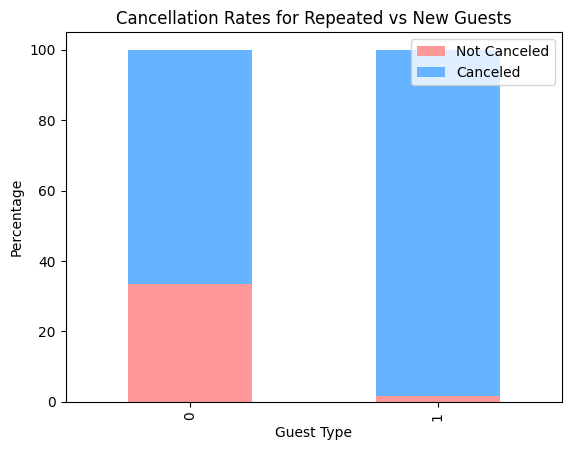

In [15]:
repeat_guest_stats = df.groupby('repeated_guest')['booking_status'].value_counts(normalize=True).unstack() * 100

repeat_guest_stats.plot(kind='bar', stacked=True, color=['#FF9999', '#66B3FF'])
plt.title('Cancellation Rates for Repeated vs New Guests')
plt.xlabel('Guest Type')
plt.ylabel('Percentage')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

C:\Users\DYNABOOK\AppData\Local\Temp\ipykernel_13476\3941636895.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




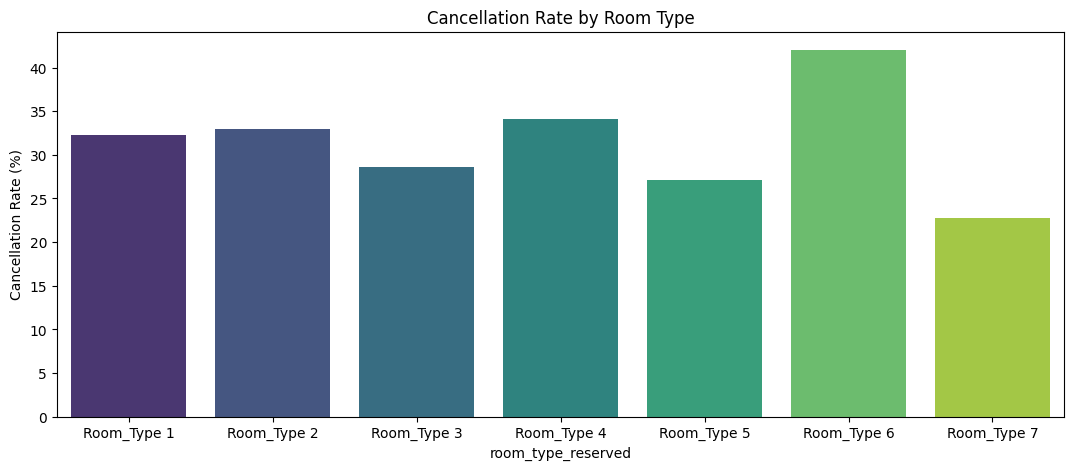

In [16]:
room_price_analysis = df.groupby('room_type_reserved').agg({
    'booking_status': lambda x: (x == 'Canceled').mean() * 100
}).reset_index()

plt.figure(figsize=(13, 5))
sns.barplot(data=room_price_analysis, x='room_type_reserved', y='booking_status', palette='viridis')
plt.title('Cancellation Rate by Room Type')
plt.ylabel('Cancellation Rate (%)')
plt.show()

In [17]:
correlation_matrix = df.corr(numeric_only=True)

fig = px.imshow(correlation_matrix,
                 text_auto=True,         
                 color_continuous_scale='RdBu_r',  
                 labels=dict(color='Correlation')) 

fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
)

fig.show()

In [18]:
label_encoders = {}
categorical_features =  ["type_of_meal_plan", "room_type_reserved", "market_segment_type", "booking_status"]
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
X = df.drop('booking_status', axis=1)  
y = df['booking_status']              

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

def forward_selection(X_train, y_train):
    remaining_features = list(X_train.columns)
    selected_features = []
    best_score = 0  # Start with a baseline score

    while remaining_features:
        scores_with_candidates = []

        # Try adding each remaining feature and evaluate its score
        for feature in remaining_features:
            X_train_temp = X_train[selected_features + [feature]]  # Add feature to selected set
            model = LogisticRegression(max_iter=1000)  # Logistic Regression model
            model.fit(X_train_temp, y_train)
            score = model.score(X_train_temp, y_train)  # Evaluate the model's score
            scores_with_candidates.append((score, feature))

        # Sort scores by the model score (descending)
        scores_with_candidates.sort(reverse=True, key=lambda x: x[0])

        # Select the feature with the best score
        best_score, best_feature = scores_with_candidates[0]  # Top feature after sorting

        # Add the feature with the best score to the selected set
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)  # Remove the feature from remaining ones

    return selected_features